In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle = 100
ensemble = 2500

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = None,
    Lambda = None,
    boundary = 10.0,
    N_bins = None,
    gamma = 1.0,
    temperature = 1.0,
    tau = 5.0,
    Da = 5.0,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,std,time,interval
4316,5cbb8c,100,2500,0.001000,0.01000,10.0,40,1.0,0.01000,1.0,5.0,5.0,0.001,10000,10000,0.7228,0.625307,13075.301380,32.0
8938,d3ecb6,100,2500,0.001000,0.01000,10.0,40,1.0,0.10000,1.0,5.0,5.0,0.001,10000,10000,-1.0848,0.622260,9575.300879,32.0
10115,914383,100,2500,0.001000,0.03162,10.0,40,1.0,0.01000,1.0,5.0,5.0,0.001,10000,10000,-0.5128,1.115243,9639.691425,32.0
11215,1efec6,100,2500,0.001000,0.03162,10.0,40,1.0,0.10000,1.0,5.0,5.0,0.001,10000,10000,0.7748,1.123768,10317.188748,32.0
6694,b94bf7,100,2500,0.001000,0.10000,10.0,40,1.0,0.01000,1.0,5.0,5.0,0.001,10000,10000,-1.3080,1.998632,9948.791108,32.0
8368,808261,100,2500,0.001000,0.10000,10.0,40,1.0,0.10000,1.0,5.0,5.0,0.001,10000,10000,-4.0004,2.041417,8037.604194,32.0
11286,f2bb97,100,2500,0.003162,0.01000,10.0,40,1.0,0.01000,1.0,5.0,5.0,0.001,10000,10000,0.8728,0.629714,13076.040872,32.0
9918,b307d3,100,2500,0.003162,0.01000,10.0,40,1.0,0.03162,1.0,5.0,5.0,0.001,10000,10000,-1.2140,0.628457,9585.508117,32.0
10006,95676f,100,2500,0.003162,0.01000,10.0,40,1.0,0.10000,1.0,5.0,5.0,0.001,10000,10000,-1.3276,0.634952,9596.894427,32.0
3108,cde1b7,100,2500,0.003162,0.03162,10.0,40,1.0,0.01000,1.0,5.0,5.0,0.001,10000,10000,0.3020,1.115230,9662.525391,32.0


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['5cbb8c', 'd3ecb6', '914383', '1efec6', 'b94bf7', '808261', 'f2bb97', 'b307d3', '95676f', 'cde1b7', '7e3287', '6e1058', 'e1ee53', 'ae0429', '5f1f20', '90be35', 'd39ca0', 'f4e98a', 'b64d7d', 'a55f99', '1d311b', '62f9a2', '8bbb8c', '45acee', 'b23824', '01ad03', 'd3649c', '329b4e', 'c99408', 'e96070', 'd5710e', 'c74730', '14a84b', '0bd2c7', '7bb70f', 'e5b79f', '77e9ca', '9b8d79', 'd7160e', '456f97', 'ff7a6d', '386a2e', '17fe0f', 'd50dd1', '600c45', 'e057cf', 'b998ae', '1c5a3a', '0d6554', '50fd51', '73ca13', '26b3ad', '67d3b0', '4c8015', 'b3a46b', 'f820dd', '724d64']
57


In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")
print(f"velocity = {available_velocity}")

data = 3 x 3 x 7 = 63
slope = [0.01, 0.03162, 0.1]
Lambda = [0.01, 0.03162, 0.1]
velocity = [0.001, 0.003162, 0.01, 0.03162, 0.1, 0.3162, 1.0]


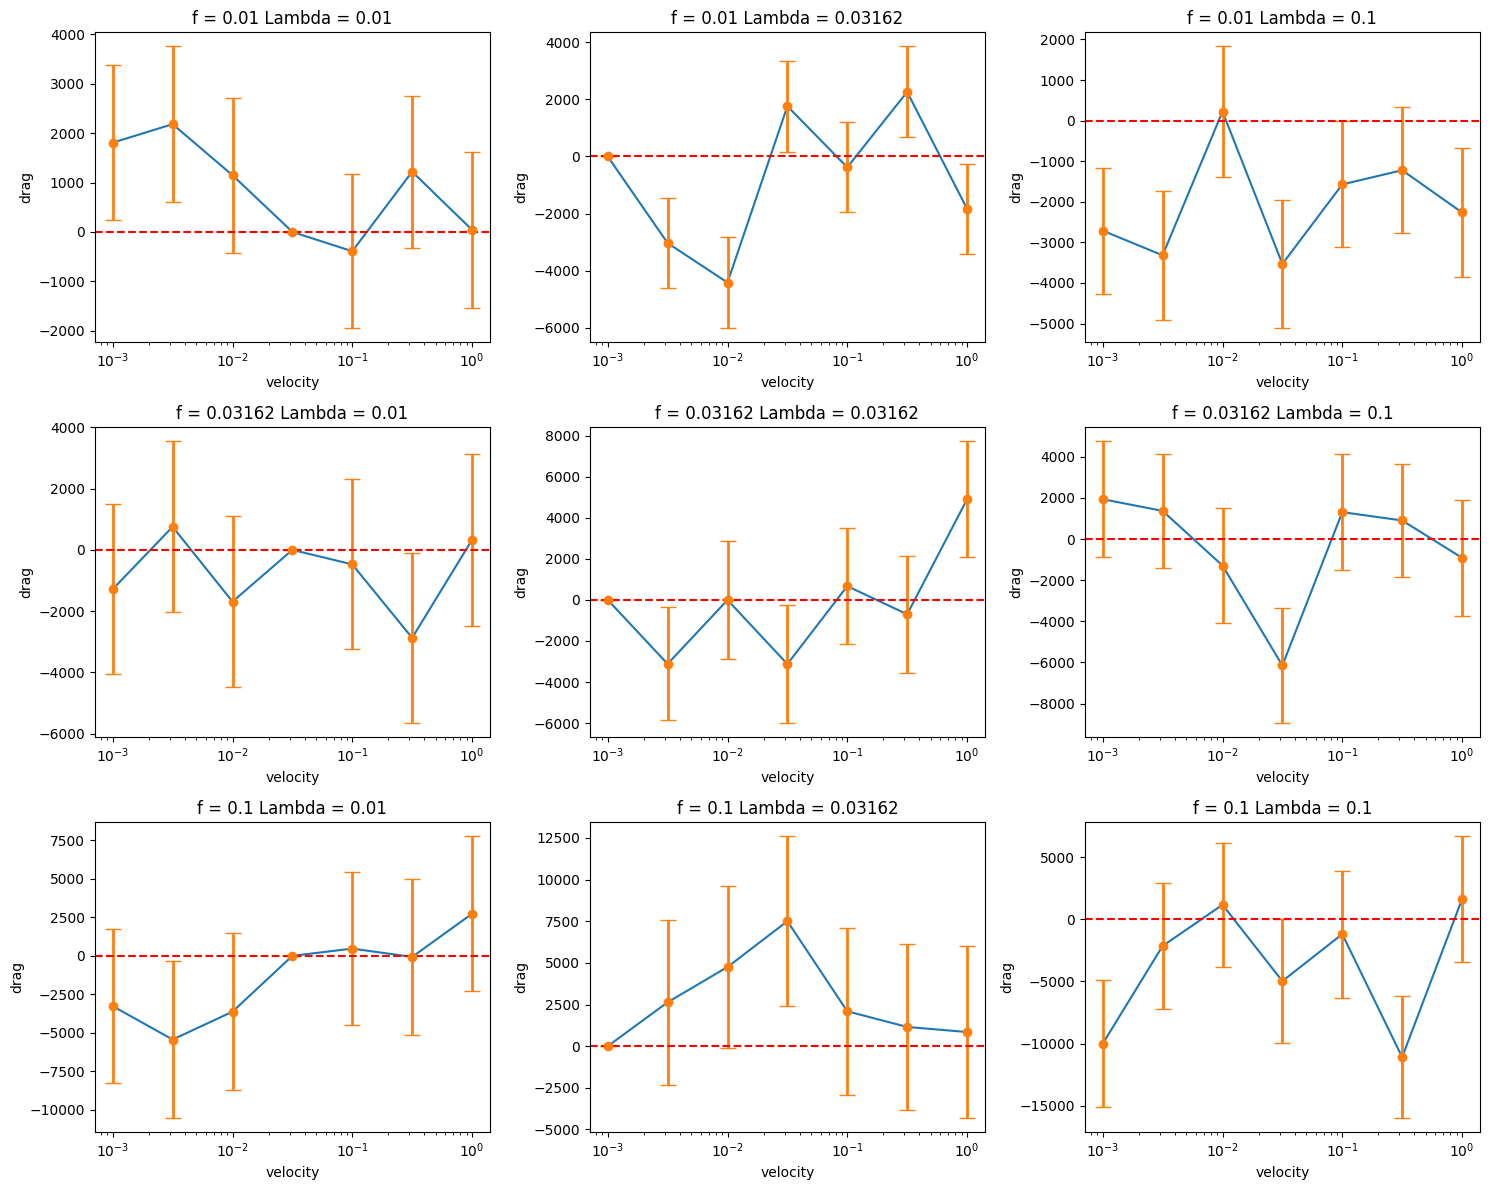

In [43]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)

fig, axs = plt.subplots(3, 3, figsize=(15,12))

for i in range(3):
    for j in range(3):
        ax = axs[i,j]
        ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}")
        ax.set_xlabel("velocity")
        ax.set_ylabel("drag")
        ax.plot(available_velocity, drag[:,i,j])
        ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
        ax.axhline(0, linestyle="--", color="red")
        ax.set_xscale("log")

fig.tight_layout()
plt.show()

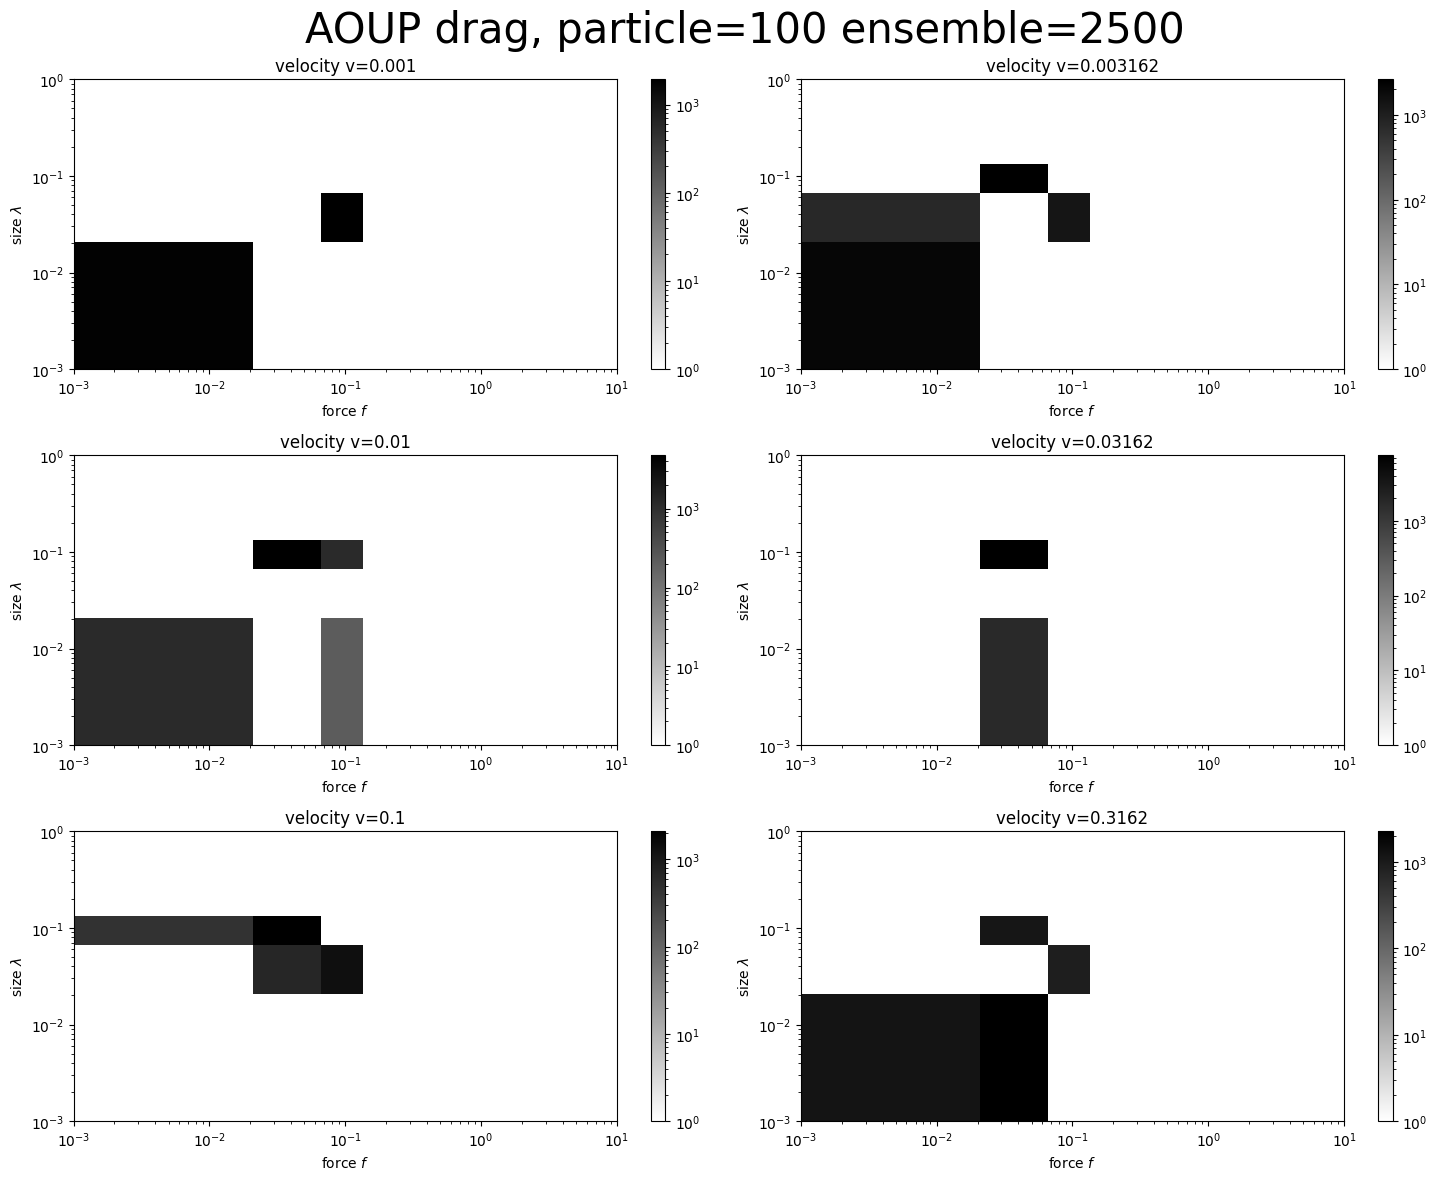

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity)
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}")
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:197: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:198: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


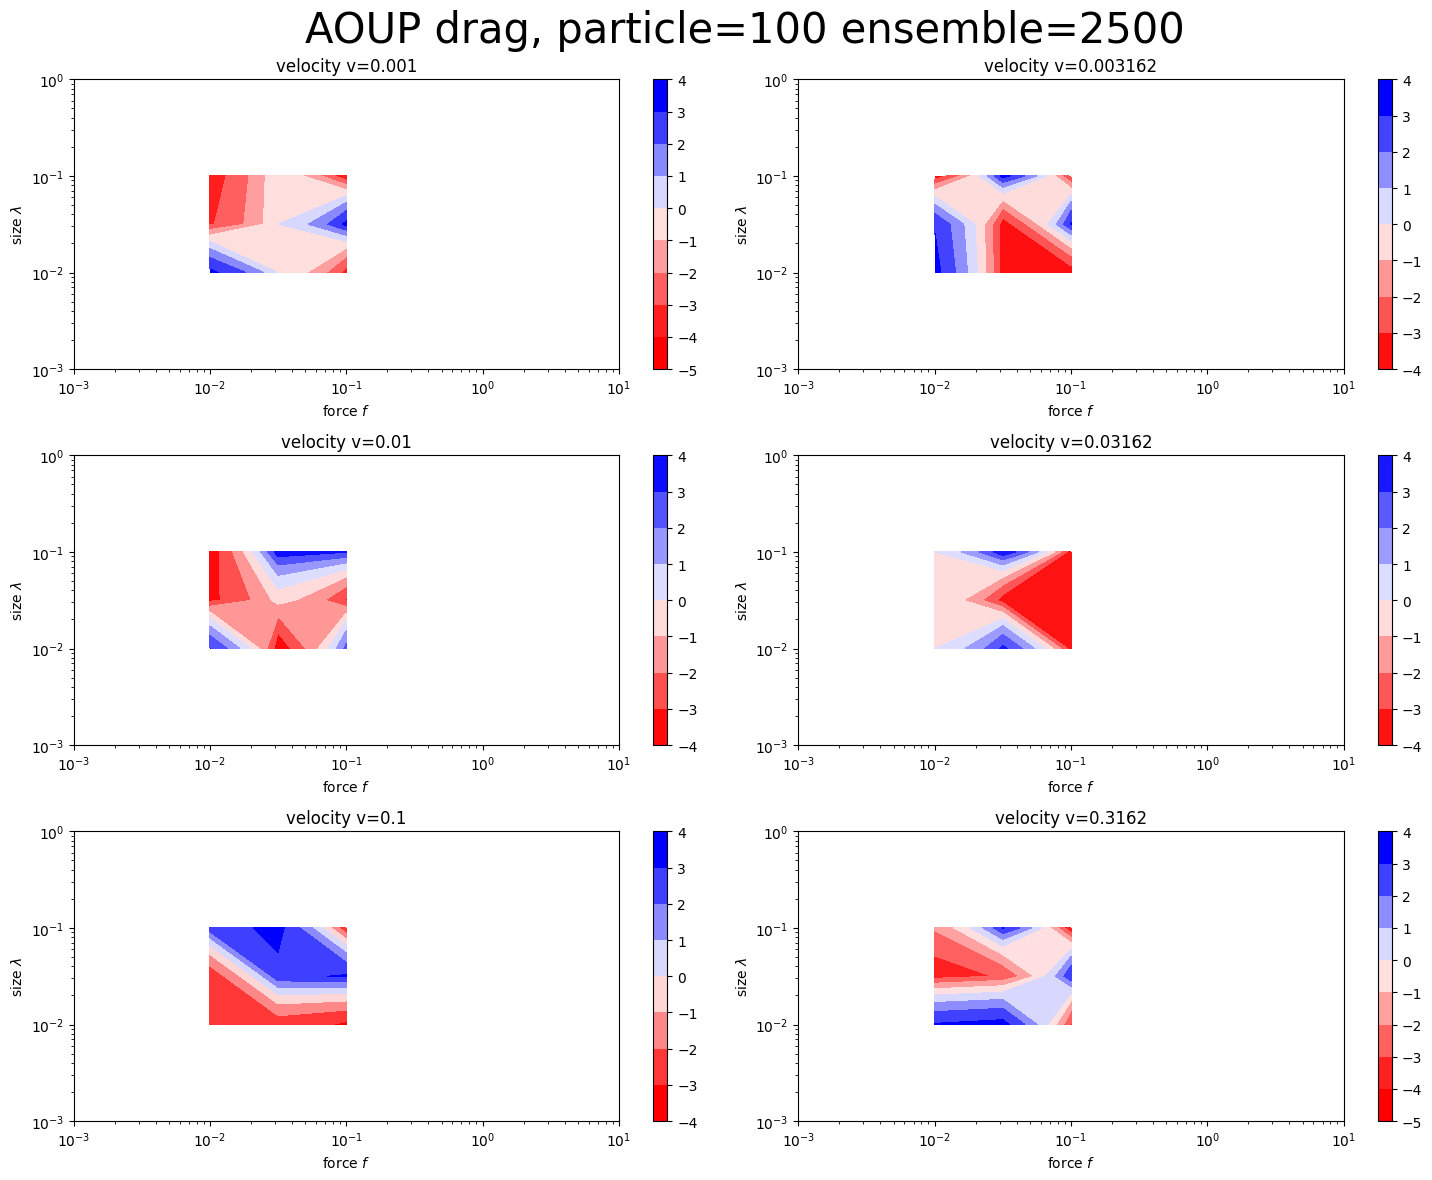

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity)

    cvals  = [data.min(), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1698518/1680568527.py:12: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


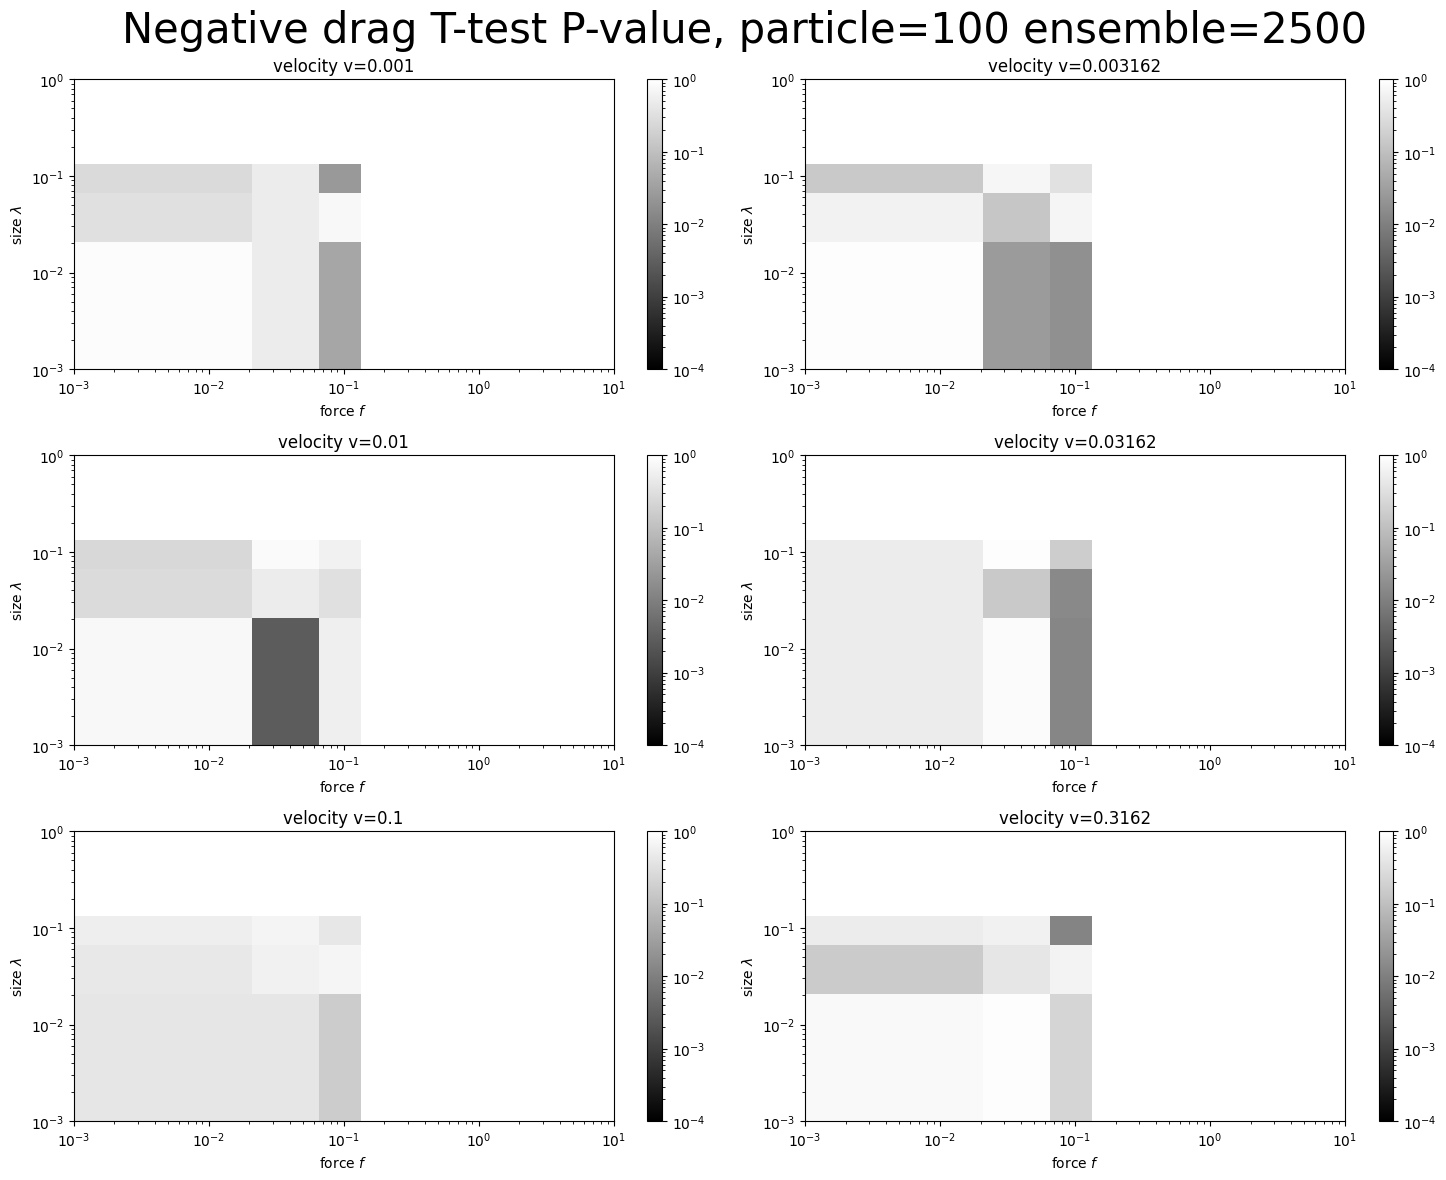

In [10]:
import scipy.stats

fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity)
    std = get_std_by_velocity(df, velocity=velocity)

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [1.e-4, 1.e0]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e+1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/Negative drag T-Test P-value, particle={particle} ensemble={ensemble}.jpg")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

8.762938771419433 5.767803483975766


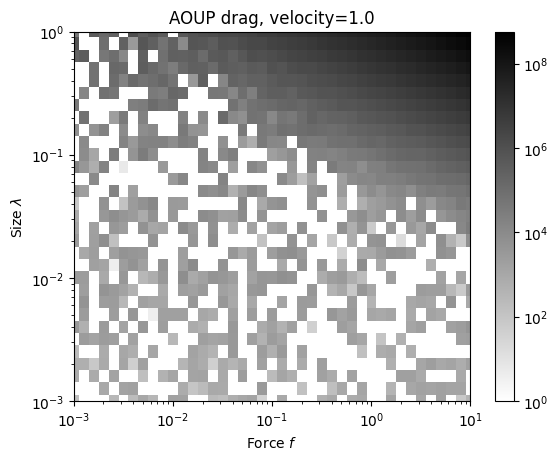

In [ ]:
fig, ax = plt.subplots()
velocity = 1.0

drag = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

cvals  = [1, drag.max()]
colors = ["white", "black"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=norm, cmap=cmap)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

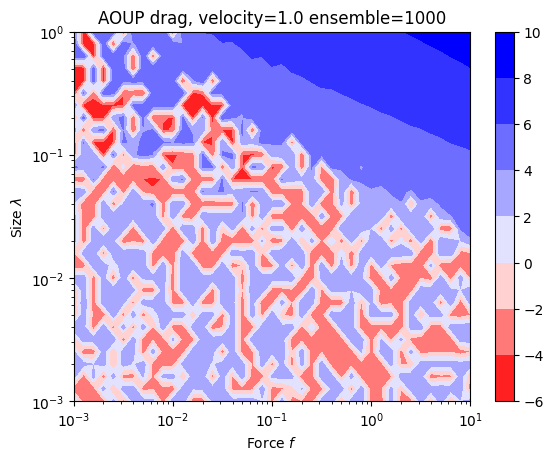

In [ ]:
fig, ax = plt.subplots()

data = get_log_scale(df, velocity=velocity)

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

0.004502841329233225


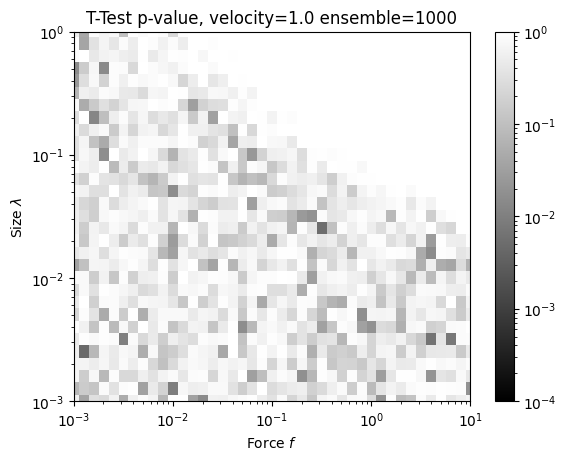

In [ ]:
drag = get_drag_by_velocity(df, velocity=velocity)
std = get_std_by_velocity(df, velocity=velocity)

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = scipy.stats.norm.cdf(Z)
# print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

cvals = [1.e-4, 1]
colors = ["black", "white"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=norm, cmap=cmap)

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()